Prophet example.

Note: this is **not** fair to Prophet. Prophet defaults to a well defined business cycle: trend, seasonality, day of week, and so on. These are aspects of the finance problems Prophet is designed to solve. They are not aspects of our artificial problem.



## Setting up our example

In [1]:
# set up Python
import numpy as np
import pandas as pd
from prophet import Prophet
import plotnine
from plotnine import *
from nested_model_fns import plot_model_quality

# set plot size
plotnine.options.figure_size = (16, 8)

In [2]:
d_train = pd.read_csv("d_train.csv")
d_test = pd.read_csv("d_test.csv")

## Prophet

### Prophet without external regressors

In [3]:
# https://facebook.github.io/prophet/docs/quick_start.html#python-api
m = Prophet()

In [4]:
test_date = pd.to_datetime("2024-10-30").date()
train_date = test_date - pd.to_timedelta(d_train.shape[0] + 1, unit="days")

In [5]:
d_train_p = pd.DataFrame(
    {
        "ds": [
            train_date + pd.to_timedelta(i, unit="days")
            for i in range(d_train.shape[0])
        ],
        "y": d_train["y"],
    }
)

d_train_p

,ds,y
0,2022-02-22,219.0
1,2022-02-23,221.0
2,2022-02-24,230.0
3,2022-02-25,214.0
4,2022-02-26,208.0
...,...,...
975,2024-10-24,9.0
976,2024-10-25,0.0
977,2024-10-26,2.0
978,2024-10-27,12.0


In [6]:
m.fit(d_train_p)

12:37:16 - cmdstanpy - INFO - Chain [1] start processing
12:37:16 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = m.make_future_dataframe(periods=d_test.shape[0])
forecast = m.predict(future)

In [8]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-02-22,76.409127,43.554162,170.848727,76.409127,76.409127,31.583850,31.583850,31.583850,0.098759,0.098759,0.098759,31.485090,31.485090,31.485090,0.0,0.0,0.0,107.992977
1,2022-02-23,76.379734,38.918730,165.816809,76.379734,76.379734,26.949244,26.949244,26.949244,2.218180,2.218180,2.218180,24.731065,24.731065,24.731065,0.0,0.0,0.0,103.328978
2,2022-02-24,76.350341,30.799413,163.828156,76.350341,76.350341,18.530314,18.530314,18.530314,0.453173,0.453173,0.453173,18.077141,18.077141,18.077141,0.0,0.0,0.0,94.880656
3,2022-02-25,76.320948,22.131265,156.747235,76.320948,76.320948,11.658226,11.658226,11.658226,-0.025209,-0.025209,-0.025209,11.683435,11.683435,11.683435,0.0,0.0,0.0,87.979175
4,2022-02-26,76.291556,16.777940,145.373873,76.291556,76.291556,5.954054,5.954054,5.954054,0.254350,0.254350,0.254350,5.699705,5.699705,5.699705,0.0,0.0,0.0,82.245610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-11-13,87.517268,17.067034,143.656556,87.509036,87.522561,-8.784705,-8.784705,-8.784705,2.218180,2.218180,2.218180,-11.002885,-11.002885,-11.002885,0.0,0.0,0.0,78.732562
996,2024-11-14,87.535569,12.802891,141.763215,87.525753,87.542092,-9.394487,-9.394487,-9.394487,0.453173,0.453173,0.453173,-9.847660,-9.847660,-9.847660,0.0,0.0,0.0,78.141082
997,2024-11-15,87.553870,10.986214,139.075814,87.542081,87.561692,-8.604392,-8.604392,-8.604392,-0.025209,-0.025209,-0.025209,-8.579184,-8.579184,-8.579184,0.0,0.0,0.0,78.949478
998,2024-11-16,87.572171,12.158663,139.310690,87.558795,87.582045,-6.986163,-6.986163,-6.986163,0.254350,0.254350,0.254350,-7.240513,-7.240513,-7.240513,0.0,0.0,0.0,80.586008


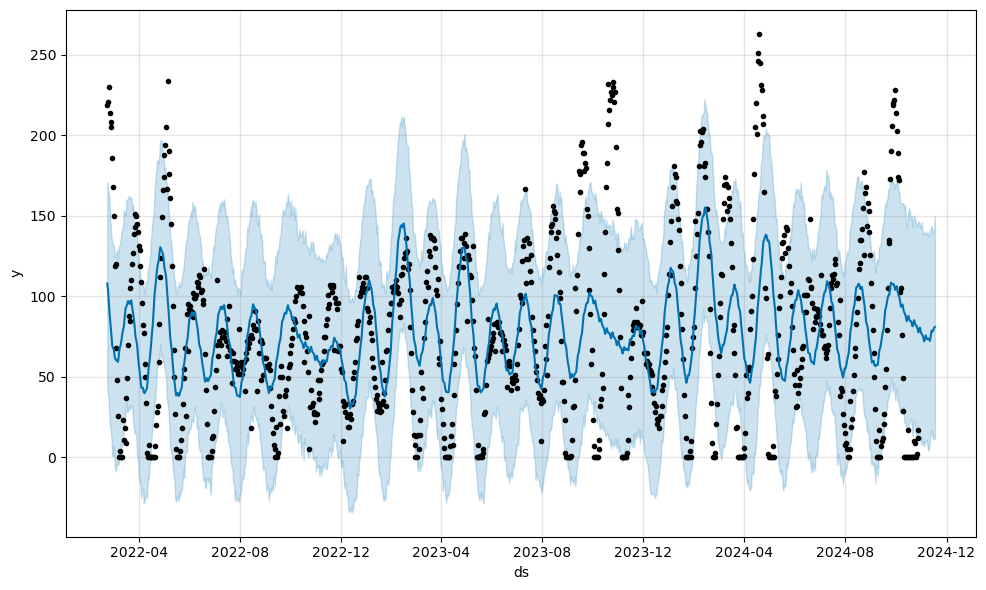

In [9]:
_ = m.plot(forecast)

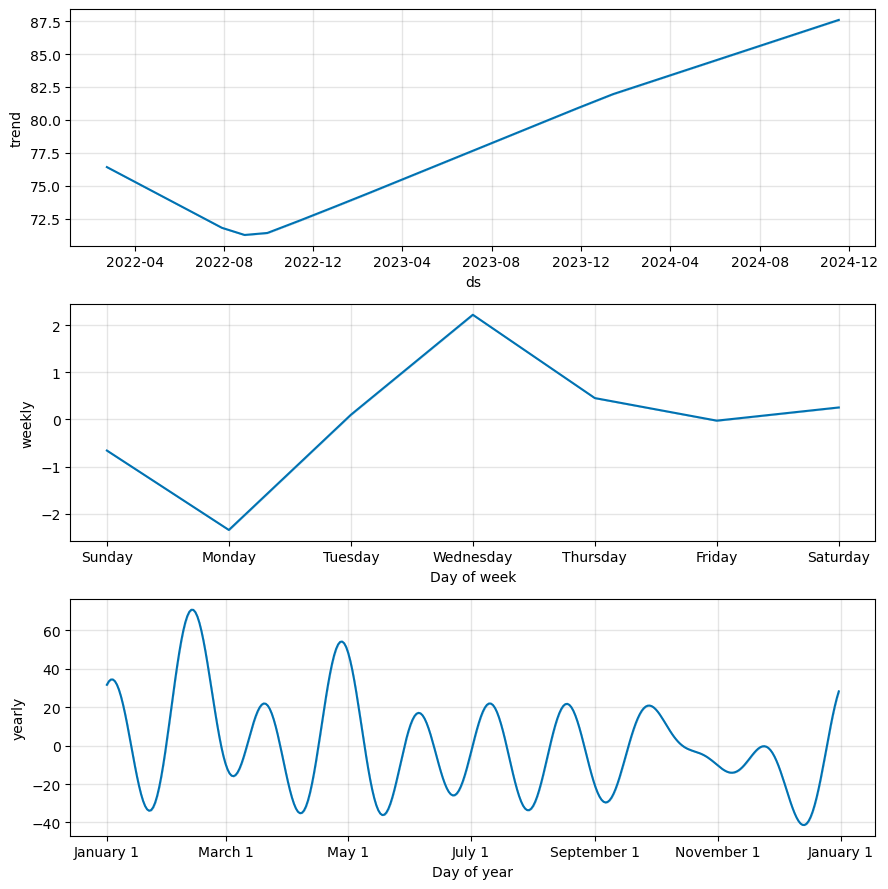

In [10]:
_ = m.plot_components(forecast)

In [11]:
forecast.shape

(1000, 19)

In [12]:
d_train.shape

(980, 5)

In [13]:
d_test.shape

(20, 5)

In [14]:
d_test["Prophet prediction (no external regressors)"] = np.array(
    forecast.loc[range(d_train.shape[0], d_train.shape[0] + d_test.shape[0]), "yhat"]
)

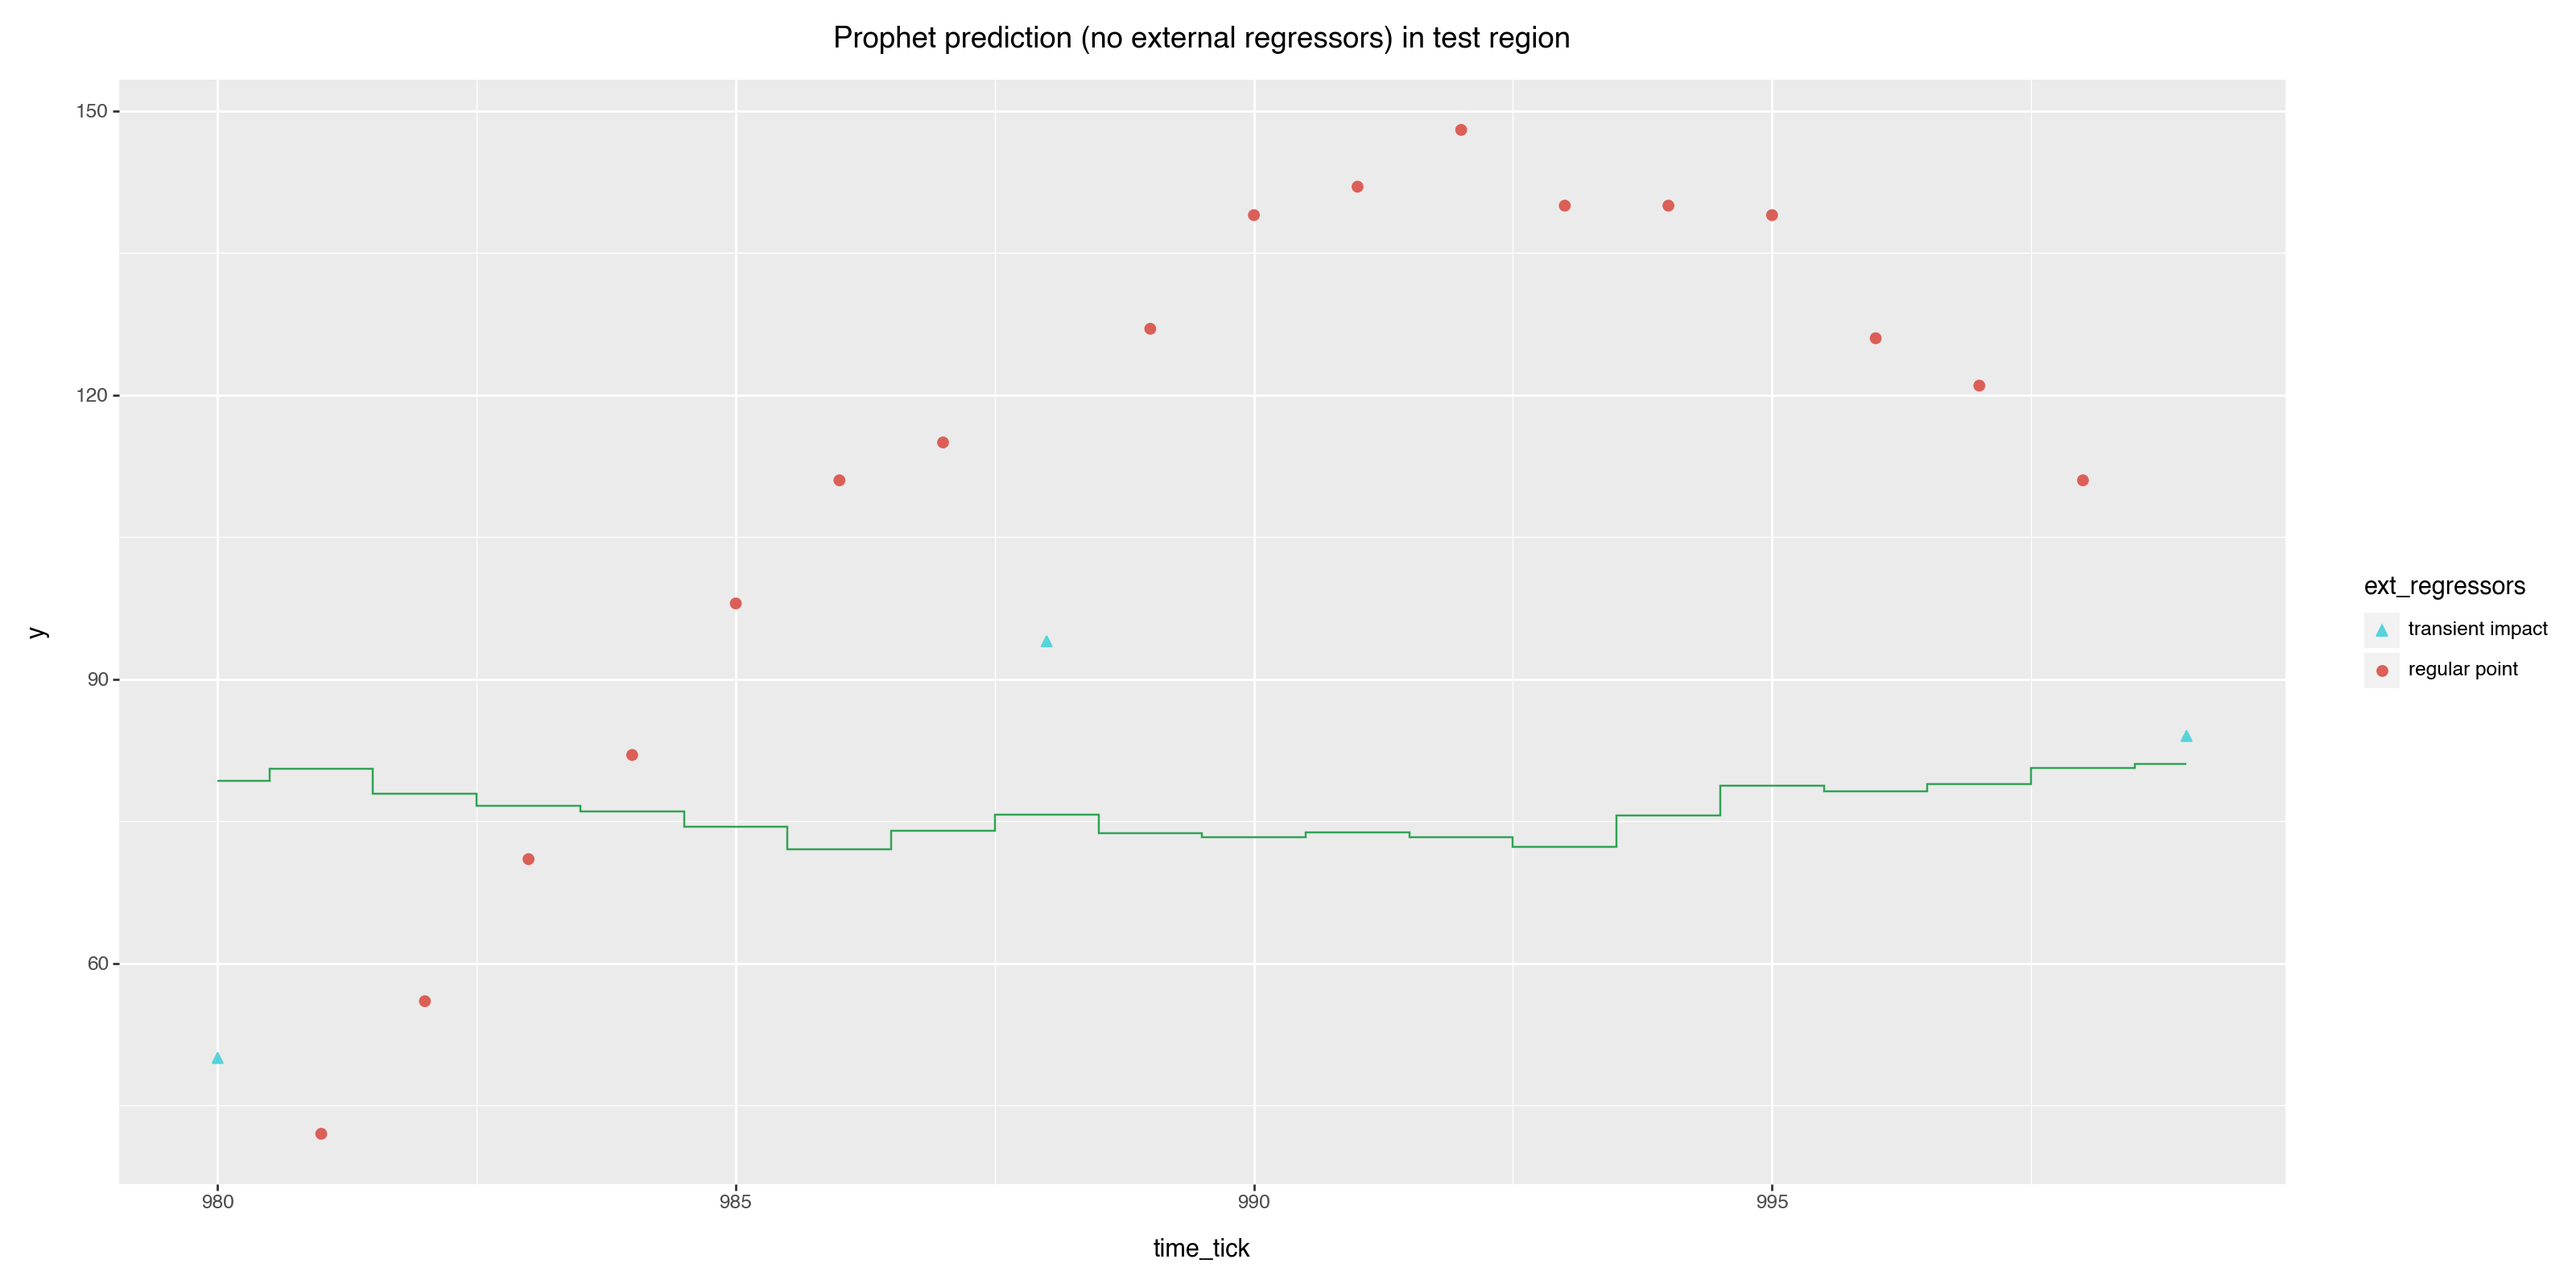

In [15]:
(
    ggplot(
        data=d_test.loc[d_test.notna().all(axis="columns"), :],
        mapping=aes(x="time_tick"),
    )
    + geom_point(
        aes(y="y", shape="ext_regressors", color="ext_regressors"),
        size=2,
    )
    + geom_step(
        aes(y="Prophet prediction (no external regressors)"),
        color="#31a354",
        direction="mid",
    )
    + guides(shape=guide_legend(reverse=True))
    + ggtitle("Prophet prediction (no external regressors) in test region")
)

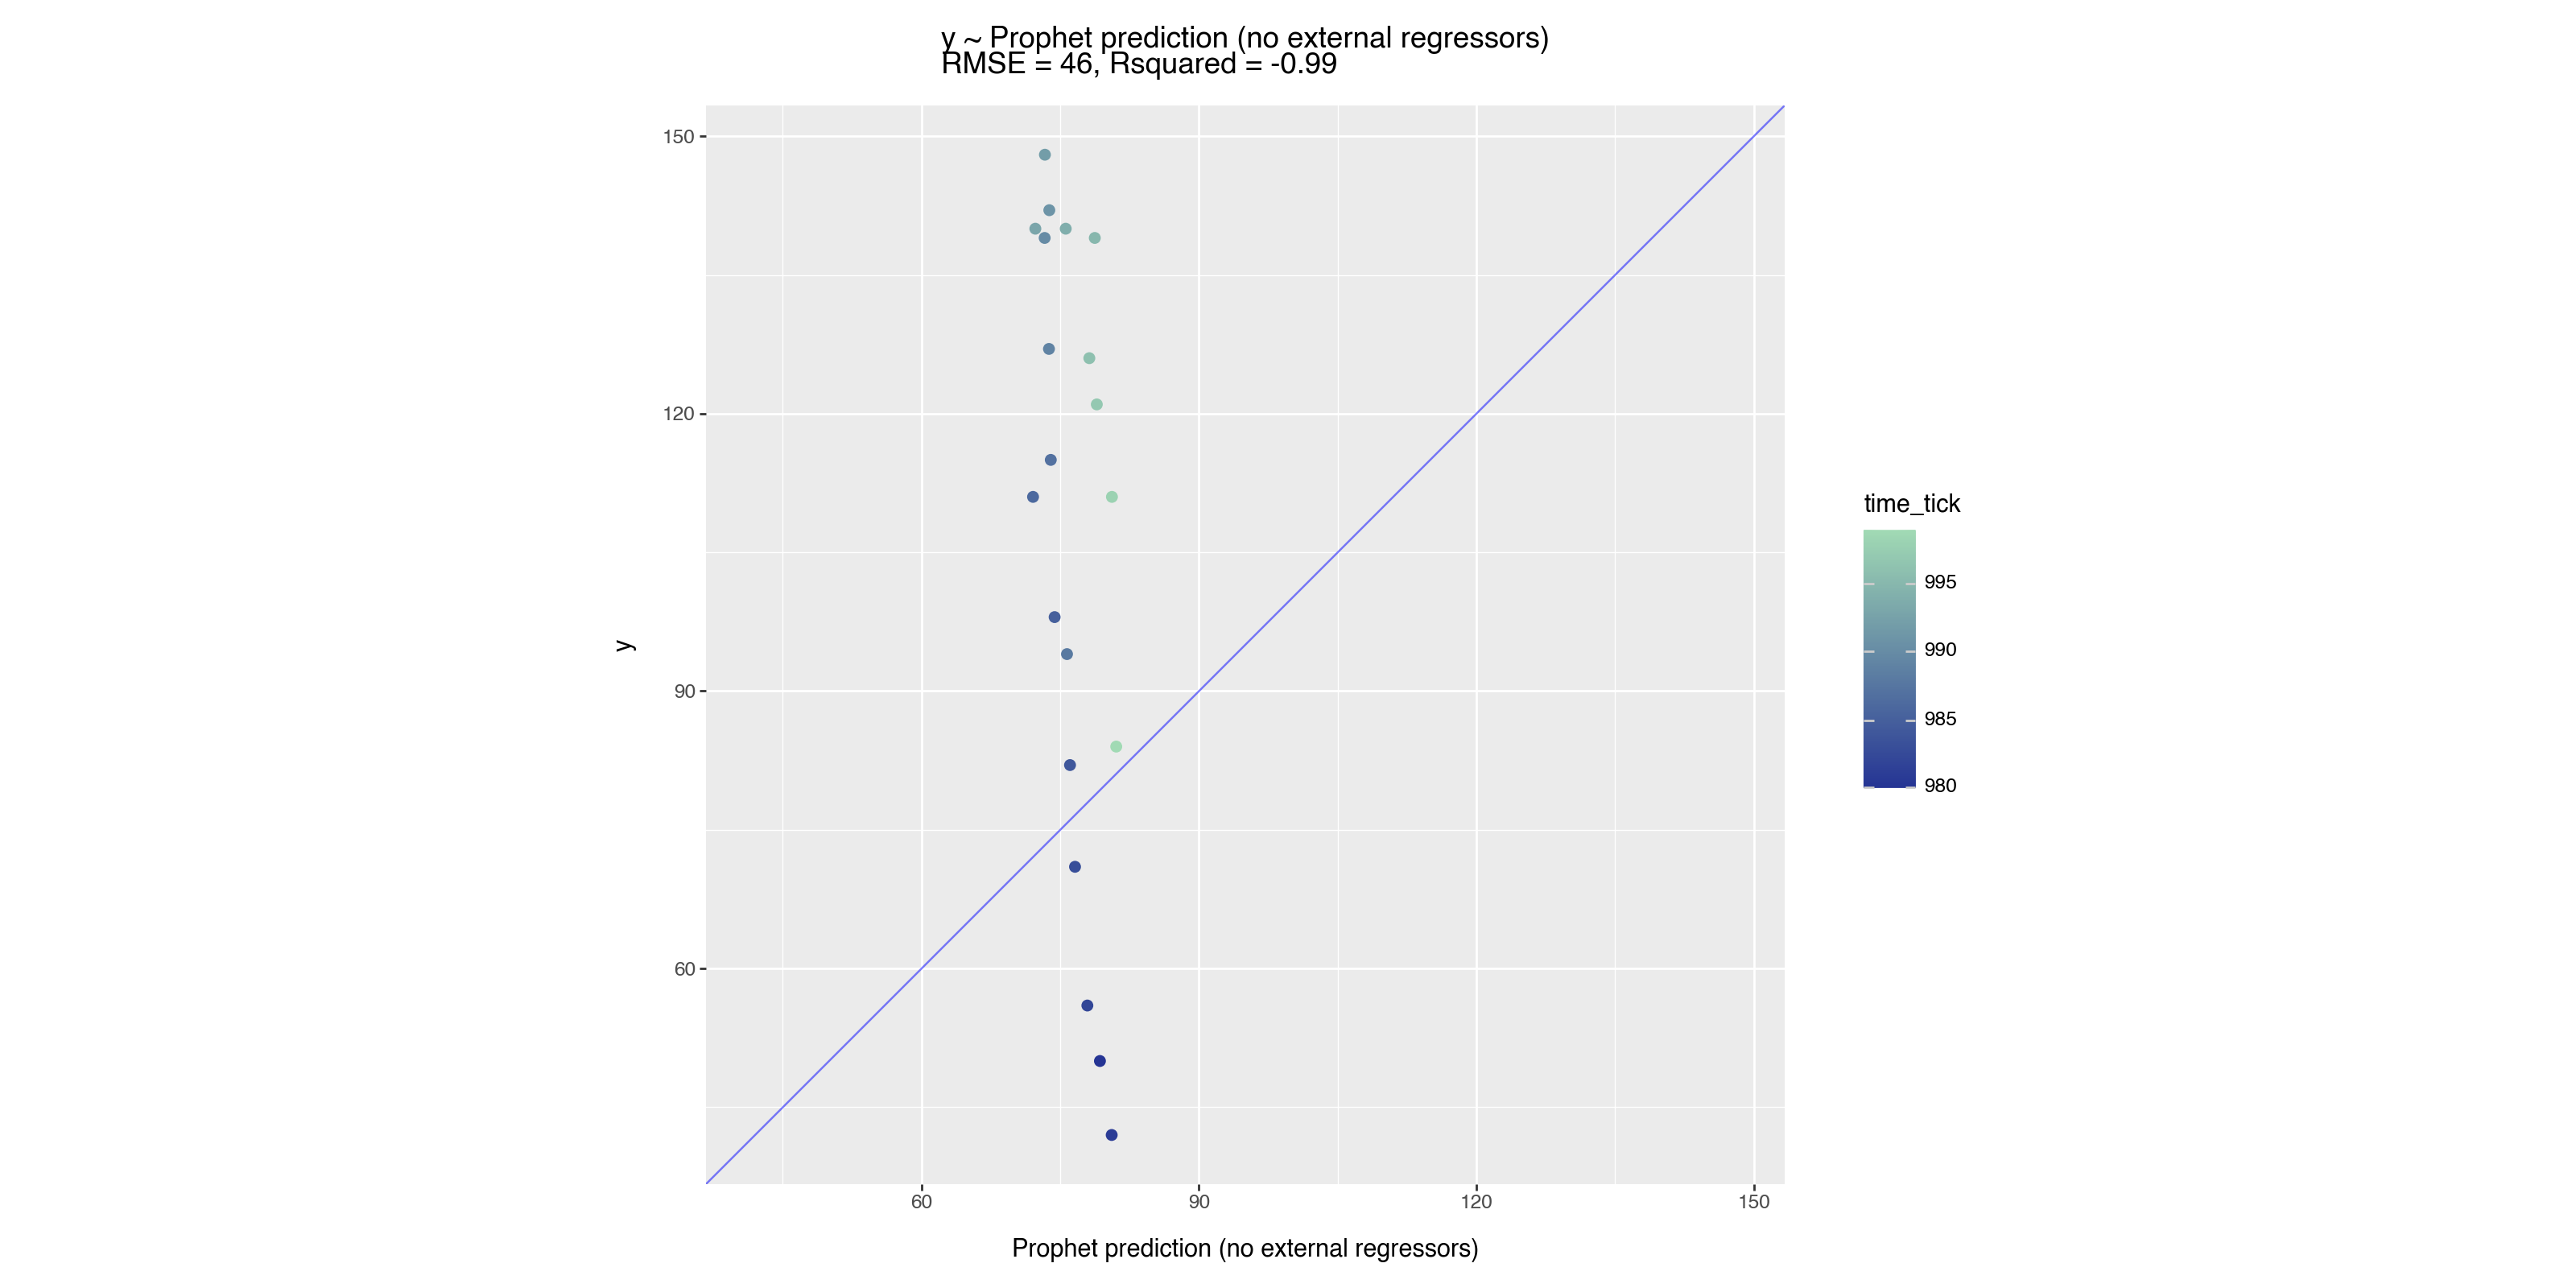

In [16]:
plot_model_quality(
    d_test.loc[
        pd.isnull(d_test["Prophet prediction (no external regressors)"]) == False, :
    ],
    result_name="Prophet prediction (no external regressors)",
)

### Prophet with external regressors

In [17]:
m_ext = Prophet()
m_ext.add_regressor("x_durable_0")
m_ext.add_regressor("x_transient_0")

In [18]:
test_date = pd.to_datetime("2024-10-30").date()
train_date = test_date - pd.to_timedelta(d_train.shape[0] + 1, unit="days")

In [19]:
d_train_p = pd.DataFrame(
    {
        "ds": [
            train_date + pd.to_timedelta(i, unit="days")
            for i in range(d_train.shape[0])
        ],
        "y": d_train["y"],
        "x_durable_0": d_train["x_durable_0"],
        "x_transient_0": d_train["x_transient_0"],
    }
)

d_train_p

,ds,y,x_durable_0,x_transient_0
0,2022-02-22,219.0,0,0
1,2022-02-23,221.0,0,0
2,2022-02-24,230.0,0,0
3,2022-02-25,214.0,0,0
4,2022-02-26,208.0,0,0
...,...,...,...,...
975,2024-10-24,9.0,0,1
976,2024-10-25,0.0,0,0
977,2024-10-26,2.0,0,0
978,2024-10-27,12.0,0,0


In [20]:
m_ext.fit(d_train_p)

12:37:18 - cmdstanpy - INFO - Chain [1] start processing
12:37:18 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
future_ext = m_ext.make_future_dataframe(periods=d_test.shape[0])
future_ext["x_durable_0"] = pd.concat([d_train["x_durable_0"], d_test["x_durable_0"]], ignore_index=True)
future_ext["x_transient_0"] = pd.concat([d_train["x_transient_0"], d_test["x_transient_0"]], ignore_index=True)

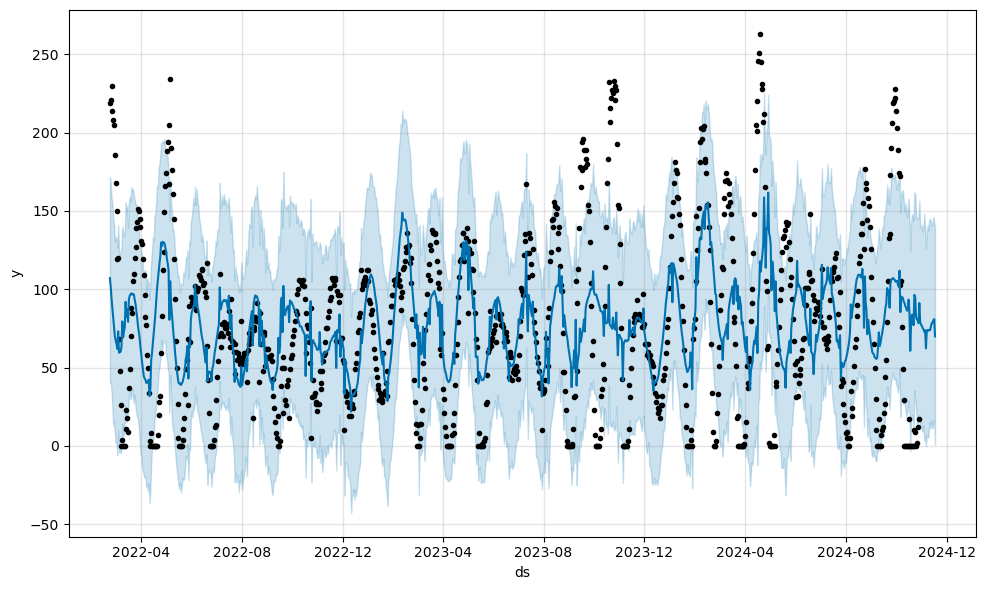

In [22]:
forecast_ext = m_ext.predict(future_ext)
_ = m_ext.plot(forecast_ext)

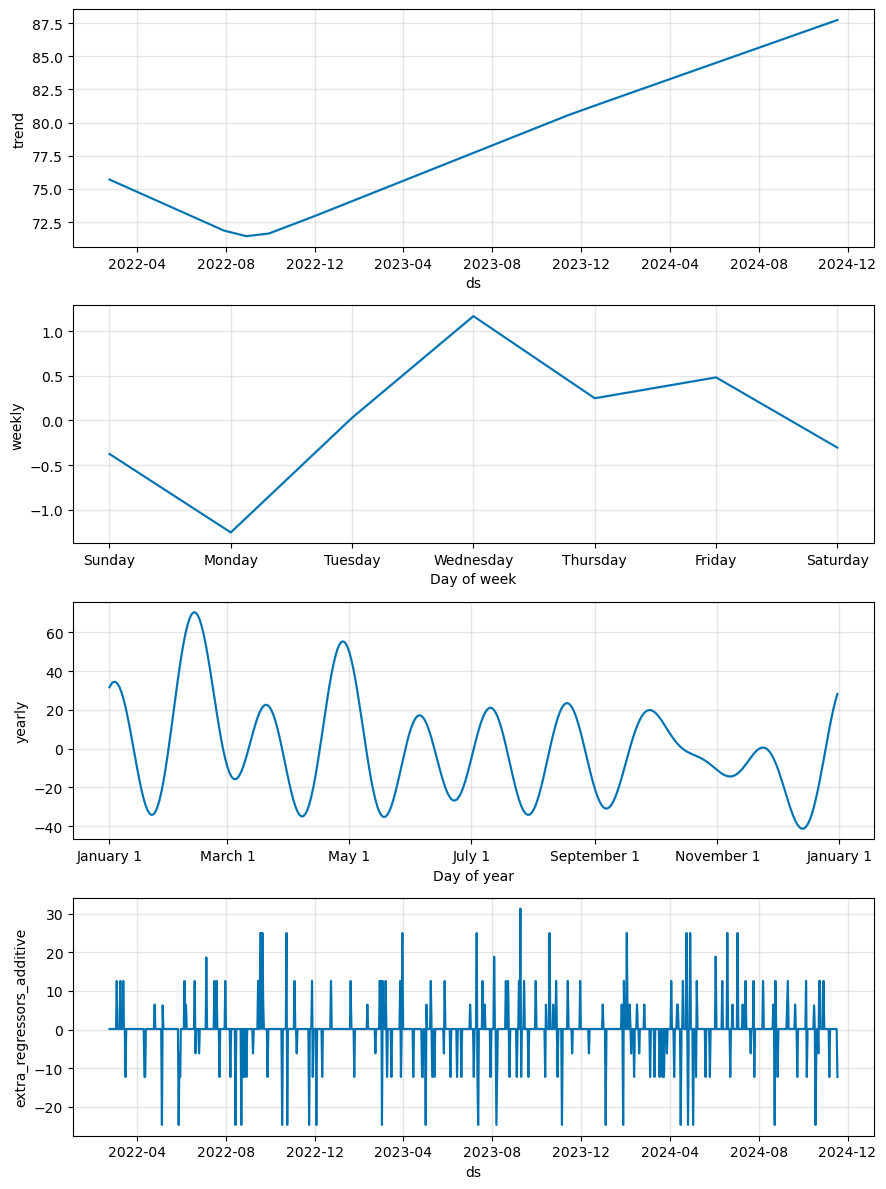

In [23]:
_ = m_ext.plot_components(forecast_ext)

In [24]:
d_test["Prophet prediction (with external regressors)"] = np.array(
    forecast_ext.loc[
        range(d_train.shape[0], d_train.shape[0] + d_test.shape[0]), "yhat"
    ]
)

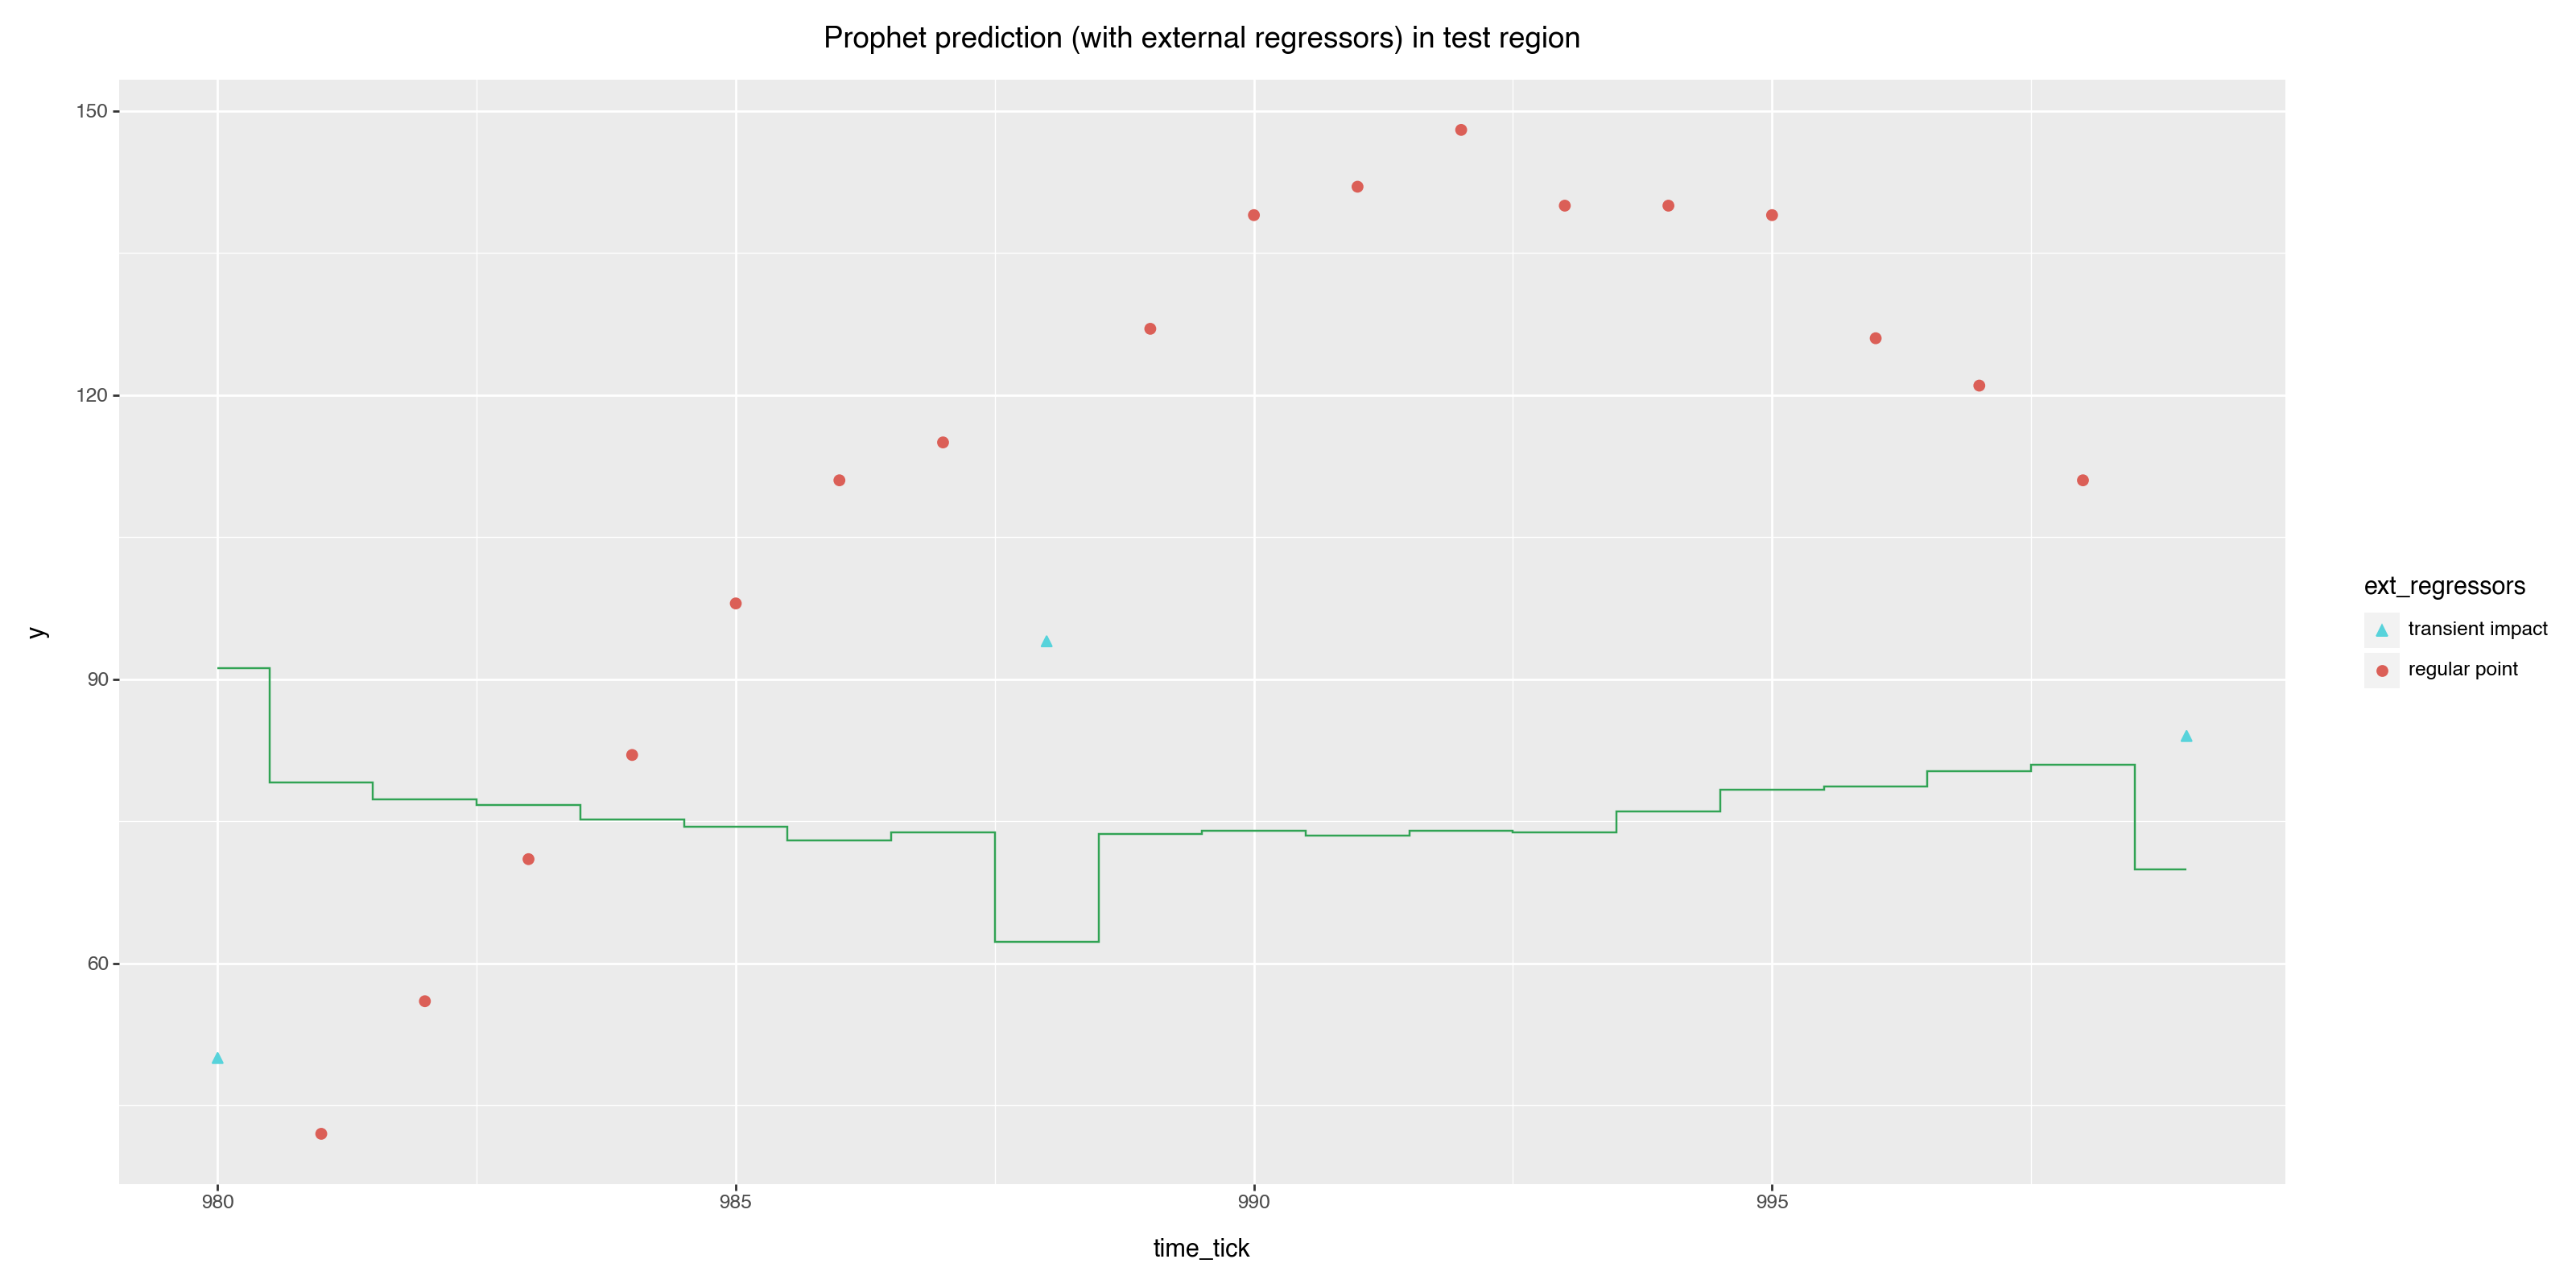

In [25]:
(
    ggplot(
        data=d_test.loc[d_test.notna().all(axis="columns"), :],
        mapping=aes(x="time_tick"),
    )
    + geom_point(
        aes(y="y", shape="ext_regressors", color="ext_regressors"),
        size=2,
    )
    + geom_step(
        aes(y="Prophet prediction (with external regressors)"),
        color="#31a354",
        direction="mid",
    )
    + guides(shape=guide_legend(reverse=True))
    + ggtitle("Prophet prediction (with external regressors) in test region")
)

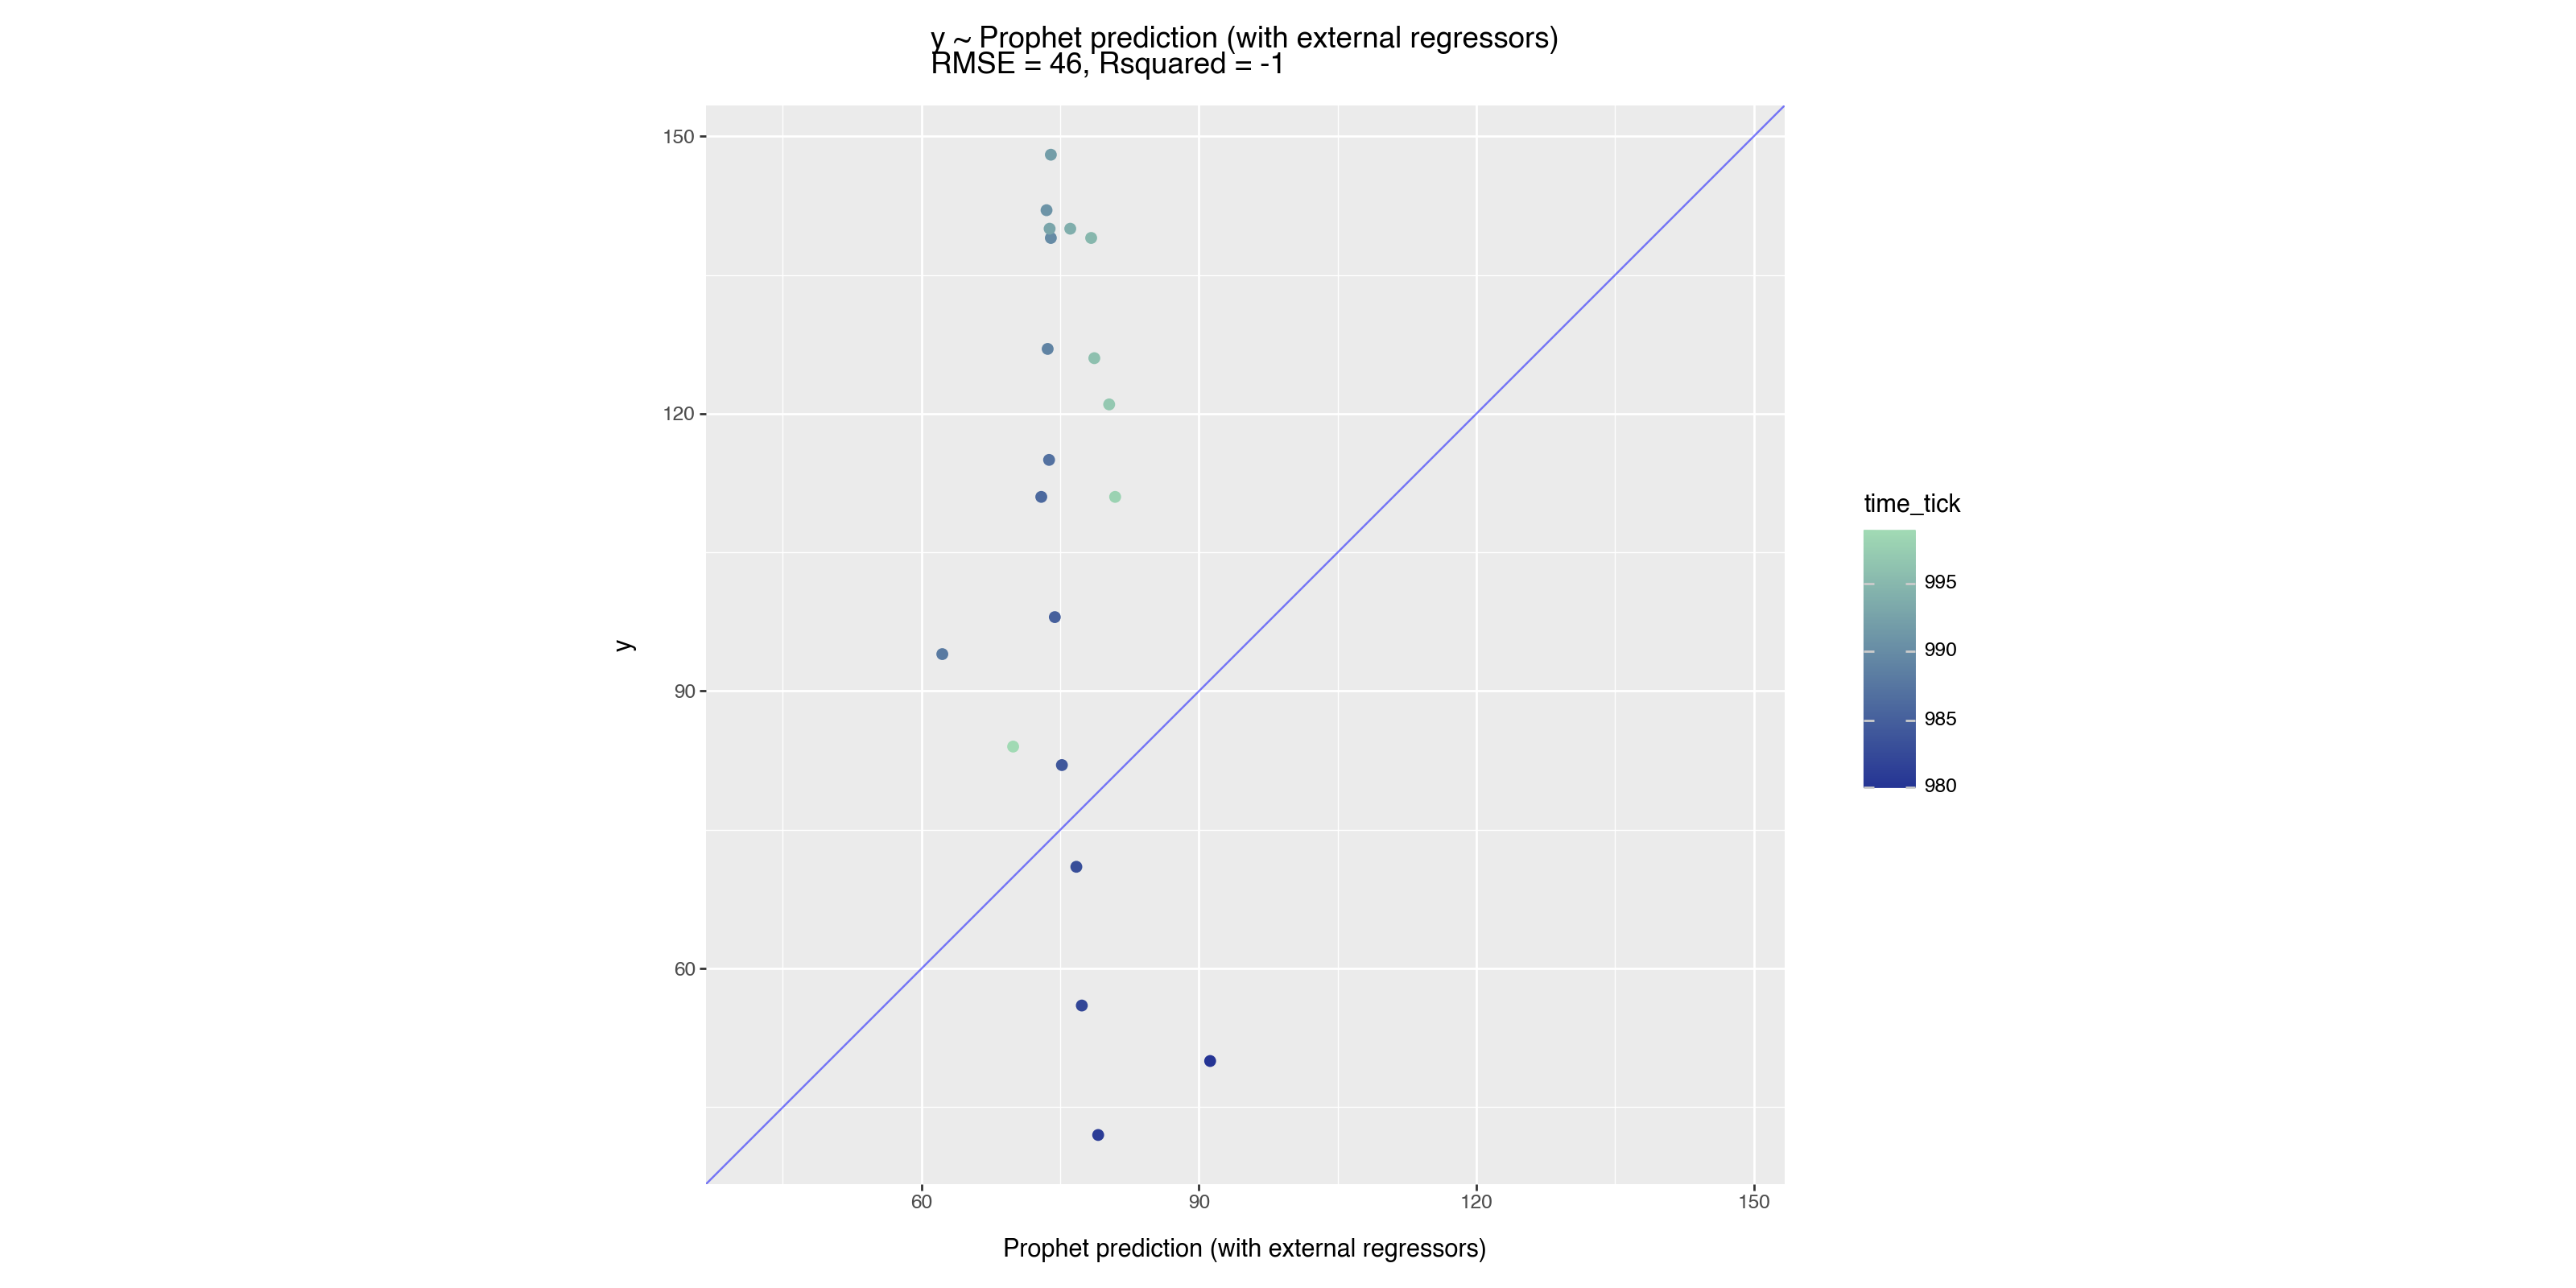

In [26]:
plot_model_quality(
    d_test.loc[
        pd.isnull(d_test["Prophet prediction (with external regressors)"]) == False, :
    ],
    result_name="Prophet prediction (with external regressors)",
)